'''

변수설명
df : 데이터 로드
df_sorted_hits : 조회수 순서로 내림차림 

total_df_reset_index
'''

In [45]:
# 경고무시
import warnings
warnings.filterwarnings("ignore")

# 폰트
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False
f_path = 'C:\Windows\Fonts\malgun.ttf'
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font',family=font_name)


In [46]:
'''
xlrd 2.0.0 이상은 .xls 파일만 읽을 수 있습니다.
잠재적인 보안 취약성으로 인해 .xlsx 파일에 대한 지원이 xlrd에서 제거되었습니다.
openpyxl을 사용하여 xlrd 대신 .xlsx 파일을 엽니다.
'''
import pandas as pd
df_raw = pd.read_excel('../data/sci.xlsx'
                       ,engine='openpyxl'
                       ,sheet_name=[2,1,0]
                       )
df_raw

{2:            등록일      분류 콘텐트타입    조회수
 0   2012-01-02  FUSION    일반  13613
 1   2012-01-02   FOCUS    일반  67983
 2   2012-01-09   FUNNY    만화   9613
 3   2012-01-09  FUSION    인물   7257
 4   2012-01-16   FUNNY    실험   4333
 ..         ...     ...   ...    ...
 100 2012-12-17   FOCUS    일반   4472
 101 2012-12-19  FUSION    일반  20005
 102 2012-12-24   FOCUS    일반   8104
 103 2012-12-26   FUNNY    실험   6142
 104 2012-12-31   FOCUS    일반   4446
 
 [105 rows x 4 columns],
 1:            등록일      분류   콘텐트타입    조회수
 0   2013-01-02  FUSION      일반  36025
 1   2013-01-07   FOCUS      일반   4987
 2   2013-01-09  FUSION      일반  42971
 3   2013-01-14   FOCUS      일반  99201
 4   2013-01-16   FUNNY      만화  10132
 ..         ...     ...     ...    ...
 99  2013-12-16   FOCUS  FUTURE   2971
 100 2013-12-18  FUSION      일반   4354
 101 2013-12-23   FOCUS      일반  10586
 102 2013-12-25   FUNNY      실험   3938
 103 2013-12-30   FOCUS      일반   2188
 
 [104 rows x 4 columns],
 0:           등록일      분류 콘텐

In [47]:
type(df_raw) # dict
df = df_raw.copy() # 복사
# 2014: df[0], 2013: df[1], 2012: df[2]

# 데이터 다 합치기
total_df_raw = pd.concat(df, ignore_index=True)

# 잘 합쳐졌나 체크
print(len(df[0])+len(df[1])+len(df[2]) == len(total_df_raw))
total_df = total_df_raw.copy()
total_df

True


,등록일,분류,콘텐트타입,조회수
0,2012-01-02,FUSION,일반,13613
1,2012-01-02,FOCUS,일반,67983
2,2012-01-09,FUNNY,만화,9613
3,2012-01-09,FUSION,인물,7257
4,2012-01-16,FUNNY,실험,4333
...,...,...,...,...
242,2014-04-28,FOCUS,일반,3106
243,2014-04-30,FUNNY,실험,1835
244,2014-05-05,FOCUS,일반,2343
245,2014-05-07,FUSION,일반,1366


In [48]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   등록일     247 non-null    datetime64[ns]
 1   분류      247 non-null    object        
 2   콘텐트타입   240 non-null    object        
 3   조회수     247 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 7.8+ KB


In [49]:
total_df_set_index_date = total_df.copy() 
total_df_set_index_date.set_index('등록일', inplace=True)
total_df_set_index_date

,분류,콘텐트타입,조회수
등록일,,,
2012-01-02,FUSION,일반,13613
2012-01-02,FOCUS,일반,67983
2012-01-09,FUNNY,만화,9613
2012-01-09,FUSION,인물,7257
2012-01-16,FUNNY,실험,4333
...,...,...,...
2014-04-28,FOCUS,일반,3106
2014-04-30,FUNNY,실험,1835
2014-05-05,FOCUS,일반,2343


<AxesSubplot:xlabel='등록일'>

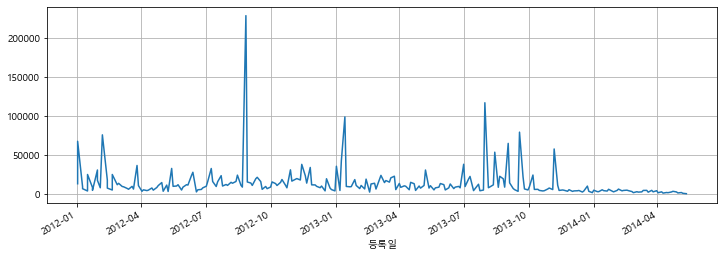

In [50]:
# 1번
total_df_set_index_date ['조회수'].plot(figsize=(12,4), grid=True)

In [59]:
total_df[total_df['조회수']>150000] # 이상치 -> 양쪽2개씩의 중간값으로 

,등록일,분류,콘텐트타입,조회수
68,2012-08-27,FOCUS,일반,228927


In [63]:
total_df.loc[68,'조회수'] = \
    (total_df.iloc[67]['조회수'] + total_df.iloc[69]['조회수']) // 2
total_df.iloc[68]['조회수']

12578

In [66]:
# 2번 
import numpy as np
total_df_prophet = pd.DataFrame({
    'ds':total_df['등록일']
    ,'y':total_df['조회수']
})
total_df_prophet

,ds,y
0,2012-01-02,13613
1,2012-01-02,67983
2,2012-01-09,9613
3,2012-01-09,7257
4,2012-01-16,4333
...,...,...
242,2014-04-28,3106
243,2014-04-30,1835
244,2014-05-05,2343
245,2014-05-07,1366


In [67]:
total_df_prophet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      247 non-null    datetime64[ns]
 1   y       247 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 4.0 KB


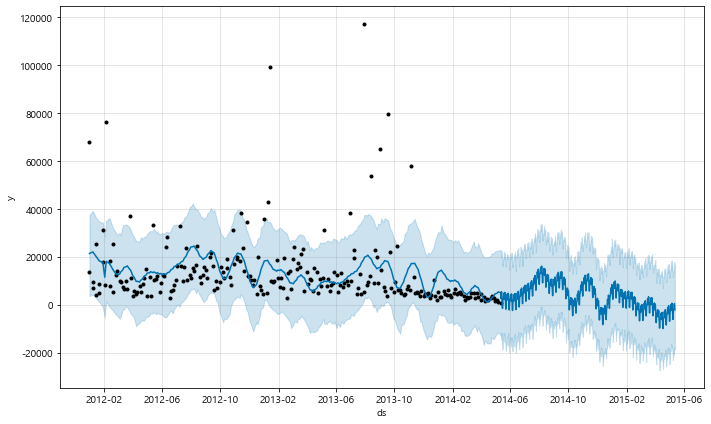

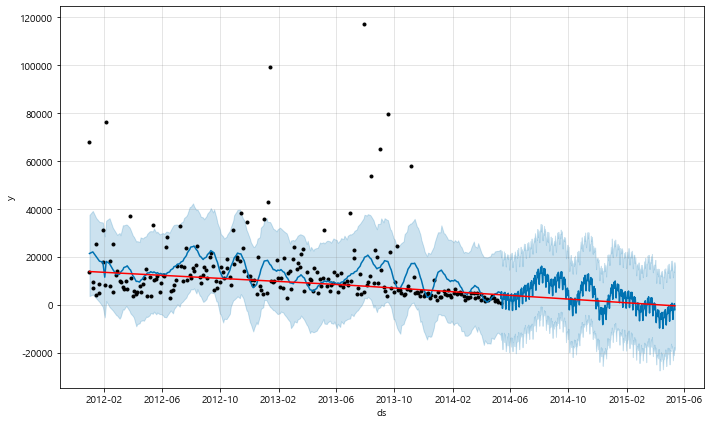

In [81]:
# 2) Prophet모듈을 이용하여  forecast 예측

# 주기성이 일단위로 있다고 알려준다
from fbprophet import Prophet
m = Prophet(daily_seasonality=True)
m.fit(total_df_prophet)

# 1년(365일) 후 주가를 예측하겠다
future = m.make_future_dataframe(periods=365)

# # 예측 시각화
forecast = m.predict(future)

# forecast
m.plot(forecast)
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast) # 변동점
plt.show()

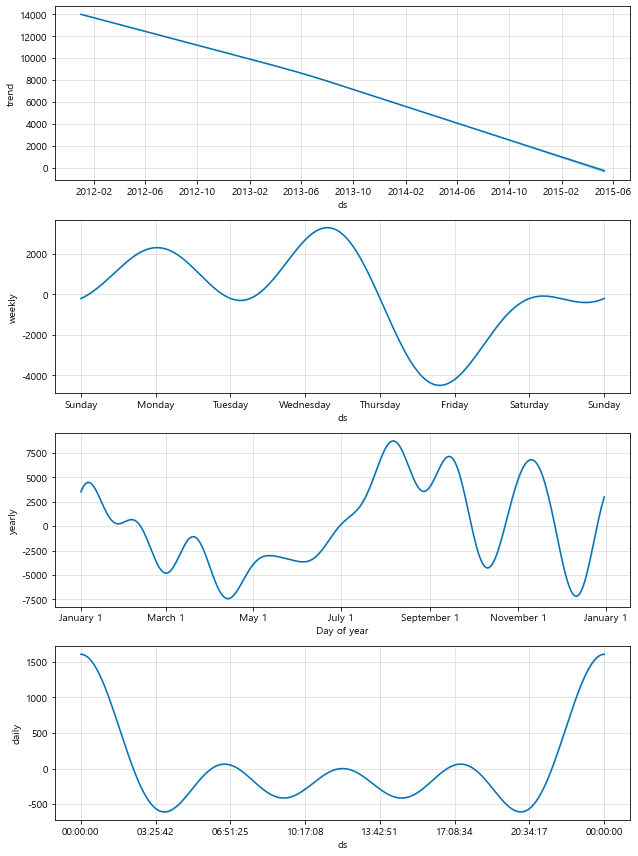

In [76]:
# 3)
m.plot_components(forecast)
plt.show()

In [84]:
# 4)
forecast = Prophet(interval_width=0.95).fit(total_df_prophet).predict(future) # 신뢰구간95%

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


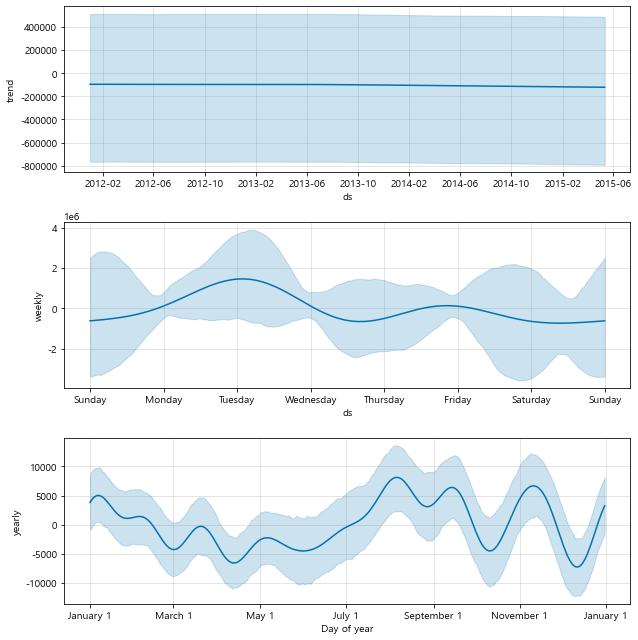

In [85]:

m = Prophet(mcmc_samples=300)
forecast = m.fit(total_df_prophet).predict(future)
fig = m.plot_components(forecast)
plt.show()